In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv('../../data/processed/combined data/combined.csv')

In [6]:
df.shape

(13519999, 23)

In [7]:
df.describe()

,totalFare,totalTravelDistance
count,13519999.00,12560380.00
mean,373.75,1569.62
std,207.55,841.49
min,23.97,97.00
25%,223.58,862.00
50%,344.60,1392.00
75%,487.60,2376.00
max,8260.61,4430.00


In [38]:
df_look = df[df['totalFare'] <= 100]

In [39]:
df_look

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
1371,5bc4694bf731939427b0df151f90d75b,2022-05-08,2022-06-14,OAK,LAX,PT1H27M,False,False,True,42.79,NaN,1655217000,2022-06-14T07:30:00.000-07:00,1655222220,2022-06-14T08:57:00.000-07:00,LAX,OAK,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,5220,NaN,coach
1576,d58b37f7d0d5fdcca9ff69766bc76540,2022-05-08,2022-06-15,OAK,DEN,PT9H42M,False,False,False,89.59,1026.00,1655306460||1655334000,2022-06-15T08:21:00.000-07:00||2022-06-15T16:0...,1655311920||1655341380,2022-06-15T09:52:00.000-07:00||2022-06-15T19:0...,LAS||DEN,OAK||LAS,Frontier Airlines||Frontier Airlines,F9||F9,||,5460||7380,417||609,coach||coach
1606,5ba7f8b08db2030a86d9976e9095b678,2022-05-08,2022-06-15,OAK,DFW,PT5H12M,False,False,False,99.16,NaN,1655352600||1655361000,2022-06-15T21:10:00.000-07:00||2022-06-15T23:3...,1655358300||1655371320,2022-06-15T22:45:00.000-07:00||2022-06-16T04:2...,LAS||DFW,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5700||10320,None||None,coach||coach
1709,b7c33b6ff95386905af061f0f63da912,2022-05-08,2022-06-15,OAK,LAX,PT1H29M,False,False,True,42.79,NaN,1655324040,2022-06-15T13:14:00.000-07:00,1655329380,2022-06-15T14:43:00.000-07:00,LAX,OAK,Spirit Airlines,NK,NaN,5340,NaN,coach
1890,928b6b8cd8bda7002bdb7685b44b54b1,2022-05-12,2022-06-04,OAK,DEN,PT2H29M,False,False,True,68.98,943.00,1654364280,2022-06-04T10:38:00.000-07:00,1654373220,2022-06-04T14:07:00.000-06:00,DEN,OAK,Frontier Airlines,F9,NaN,8940,943,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519715,55dfbfd56fa603f3d43e9978ea96f327,2022-05-05,2022-05-20,MIA,JFK,PT3H4M,True,False,True,88.60,1104.00,1653090900,2022-05-20T19:55:00.000-04:00,1653101940,2022-05-20T22:59:00.000-04:00,JFK,MIA,Delta,DL,Boeing 737-800,11040,1104,coach
13519805,049a89b064db07afaae9552ef4dcca48,2022-05-05,2022-05-20,MIA,LGA,PT3H2M,False,False,True,82.59,NaN,1653040680,2022-05-20T05:58:00.000-04:00,1653051600,2022-05-20T09:00:00.000-04:00,LGA,MIA,Spirit Airlines,NK,AIRBUS INDUSTRIE A321 SHARKLETS,10920,NaN,coach
13519806,d02a2f5267024cfbe3e7ed4e208dcfe9,2022-05-05,2022-05-20,MIA,LGA,PT3H4M,False,False,True,82.59,NaN,1653081900,2022-05-20T17:25:00.000-04:00,1653092940,2022-05-20T20:29:00.000-04:00,LGA,MIA,Spirit Airlines,NK,AIRBUS INDUSTRIE A321 SHARKLETS,11040,NaN,coach
13519906,9b73c14a9e57d17136e705a9d5bcf5bc,2022-05-05,2022-05-20,MIA,PHL,PT2H51M,False,False,True,35.97,1016.00,1653085200,2022-05-20T18:20:00.000-04:00,1653095460,2022-05-20T21:11:00.000-04:00,PHL,MIA,Frontier Airlines,F9,NaN,10260,1016,coach


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

In [40]:
df.isnull().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                     126985
segmentsCabinCode               

In [42]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [44]:
df_look = df[df['segmentsEquipmentDescription'] == '||']

In [45]:
df_look

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
10,505ee69f290db89ebb964fa009291bac,2022-05-11,2022-05-13,OAK,ATL,PT7H52M,False,False,False,534.01,2150.00,1652493480||1652511180,2022-05-13T18:58:00.000-07:00||2022-05-14T00:5...,1652502660||1652521800,2022-05-13T22:31:00.000-06:00||2022-05-14T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9180||10620,943||1207,coach||coach
45,4fb0864d37d696cee42ff056d614d414,2022-05-11,2022-05-13,OAK,CLT,PT7H32M,False,False,False,534.01,2289.00,1652493480||1652508840,2022-05-13T18:58:00.000-07:00||2022-05-14T00:1...,1652502660||1652520600,2022-05-13T22:31:00.000-06:00||2022-05-14T05:3...,DEN||CLT,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9180||11760,943||1346,coach||coach
56,db00ad2dcff34fd56b2d024155343543,2022-05-11,2022-05-13,OAK,DEN,PT7H53M,False,False,False,239.60,1026.00,1652475180||1652496300,2022-05-13T13:53:00.000-07:00||2022-05-13T19:4...,1652480760||1652503560,2022-05-13T15:26:00.000-07:00||2022-05-13T22:4...,LAS||DEN,OAK||LAS,Frontier Airlines||Frontier Airlines,F9||F9,||,5580||7260,417||609,coach||coach
80,f52324f0030bfb05dcc2b5a79104b57c,2022-05-11,2022-05-13,OAK,DFW,PT8H48M,False,False,False,219.60,1467.00,1652475180||1652497020,2022-05-13T13:53:00.000-07:00||2022-05-13T19:5...,1652480760||1652506860,2022-05-13T15:26:00.000-07:00||2022-05-14T00:4...,LAS||DFW,OAK||LAS,Frontier Airlines||Frontier Airlines,F9||F9,||,5580||9840,417||1050,coach||coach
82,f940dba1d05a5e166c5dd170e76bd481,2022-05-11,2022-05-13,OAK,DFW,PT5H51M,True,False,False,278.60,1580.00,1652461260||1652472600,2022-05-13T10:01:00.000-07:00||2022-05-13T14:1...,1652467620||1652482320,2022-05-13T12:47:00.000-06:00||2022-05-13T17:5...,SLC||DFW,OAK||SLC,Delta||Delta,DL||DL,||,6360||9720,588||992,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519835,27ff652e21fa08c7768d15b02763df37,2022-05-05,2022-05-20,MIA,LGA,PT11H11M,False,False,False,259.58,1358.00,1653058140||1653090120,2022-05-20T10:49:00.000-04:00||2022-05-20T19:4...,1653065280||1653098400,2022-05-20T12:48:00.000-04:00||2022-05-20T22:0...,ATL||LGA,MIA||ATL,Frontier Airlines||Frontier Airlines,F9||F9,||,7140||8280,596||762,coach||coach
13519837,7e28d1b4baedae33e12554fd25f2f8f1,2022-05-05,2022-05-20,MIA,OAK,PT10H30M,False,False,False,295.68,NaN,1653054000||1653086340,2022-05-20T09:40:00.000-04:00||2022-05-20T15:3...,1653073080||1653091800,2022-05-20T11:58:00.000-07:00||2022-05-20T17:1...,LAS||OAK,MIA||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||,19080||5460,None||None,coach||coach
13519910,c4513c3360b46bda79abfb114989516f,2022-05-05,2022-05-20,MIA,PHL,PT10H44M,False,False,False,139.59,1096.00,1653101160||1653130800,2022-05-20T22:46:00.000-04:00||2022-05-21T07:0...,1653105480||1653139800,2022-05-20T23:58:00.000-04:00||2022-05-21T09:3...,MCO||TTN,MIA||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,4320||9000,199||897,coach||coach
13519923,050f7286f36bc6bba86998761fa5e393,2022-05-05,2022-05-20,MIA,PHL,PT7H36M,False,False,False,263.99,1297.00,1653058140||1653077700,2022-05-20T10:49:00.000-04:00||2022-05-20T16:1...,1653065280||1653085500,2022-05-20T12:48:00.000-04:00||2022-05-20T18:2...,ATL||TTN,MIA||ATL,Frontier Airlines||Frontier Airlines,F9||F9,||,7140||7800,596||701,coach||coach


<Axes: xlabel='startingAirport', ylabel='totalFare'>

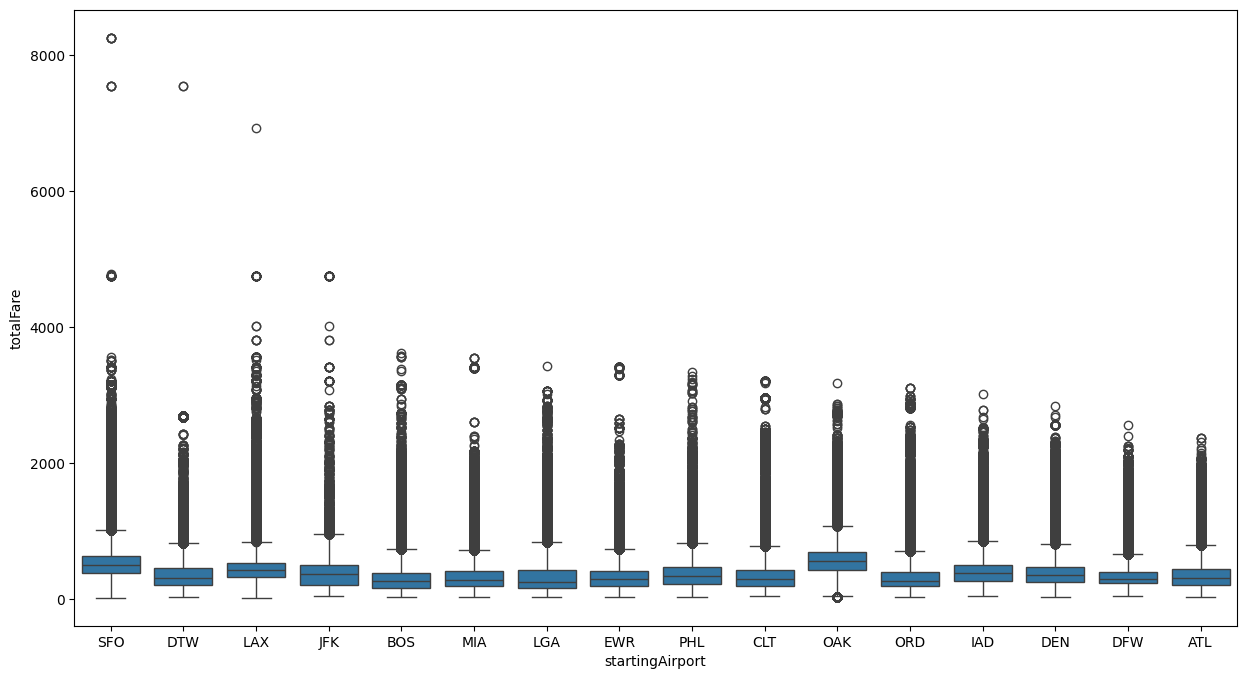

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(x='startingAirport',y='totalFare',data=df.sort_values('totalFare',ascending=False))

<Axes: xlabel='destinationAirport', ylabel='totalFare'>

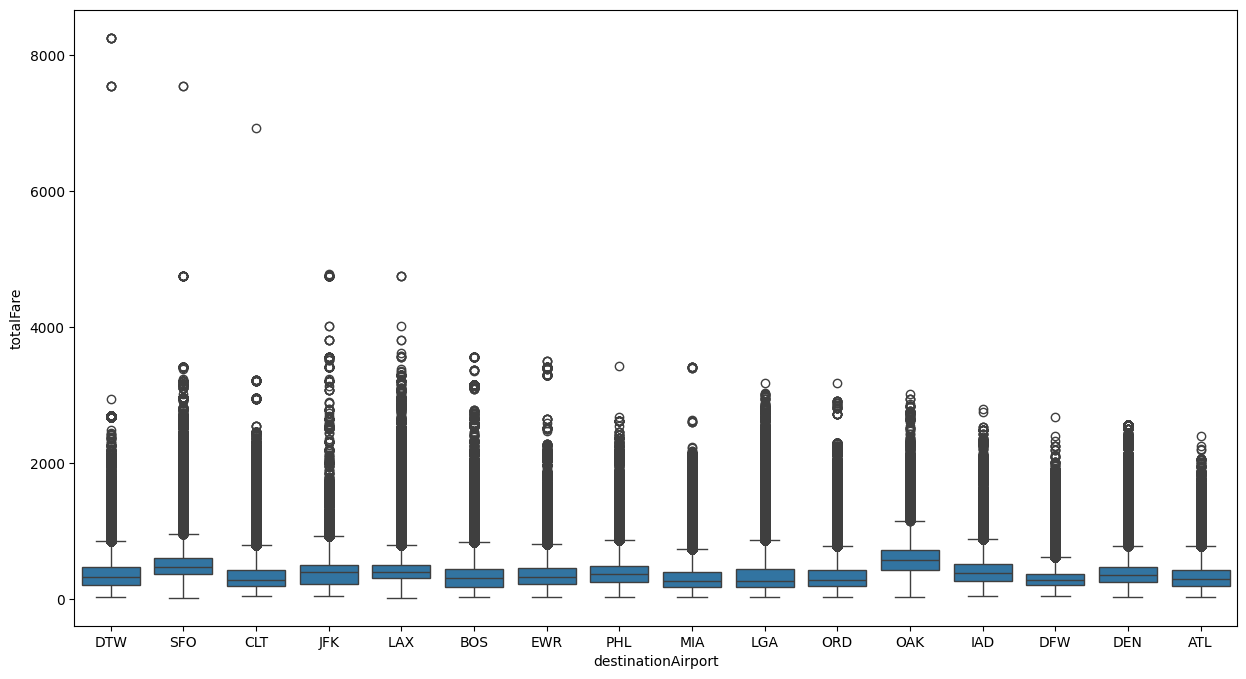

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(x='destinationAirport',y='totalFare',data=df.sort_values('totalFare',ascending=False))

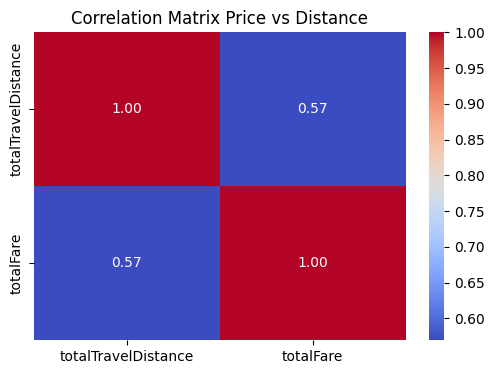

In [31]:
cols = ['totalTravelDistance', 'totalFare']
correlation_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Price vs Distance")
plt.show()

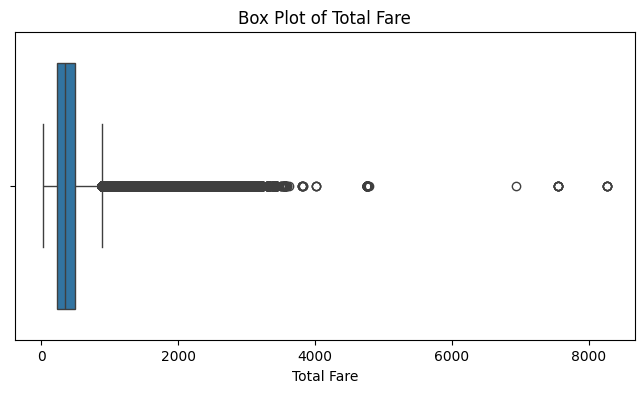

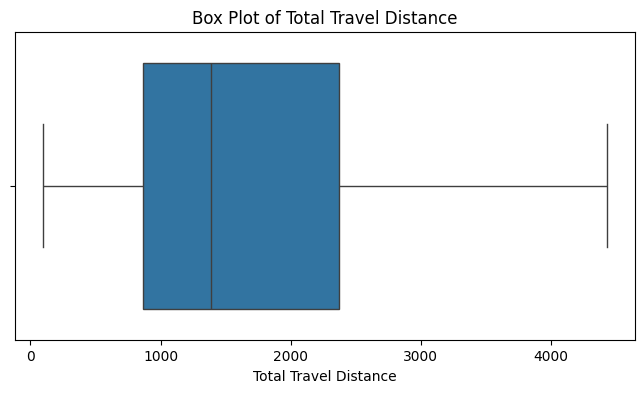

In [35]:
# Plot horizontal box plot for totalFare
plt.figure(figsize=(8, 4))
sns.boxplot(x='totalFare', data=df)
plt.title("Box Plot of Total Fare")
plt.xlabel("Total Fare")
plt.show()

# Plot horizontal box plot for totalTravelDistance
plt.figure(figsize=(8, 4))
sns.boxplot(x='totalTravelDistance', data=df)
plt.title("Box Plot of Total Travel Distance")
plt.xlabel("Total Travel Distance")
plt.show()


In [36]:
a# Convert the flightDate column to datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'], errors='coerce')

# Find the minimum and maximum dates
min_date = df['flightDate'].min()
max_date = df['flightDate'].max()

print("Minimum Flight Date:", min_date)
print("Maximum Flight Date:", max_date)


Minimum Flight Date: 2022-04-17 00:00:00
Maximum Flight Date: 2022-07-17 00:00:00


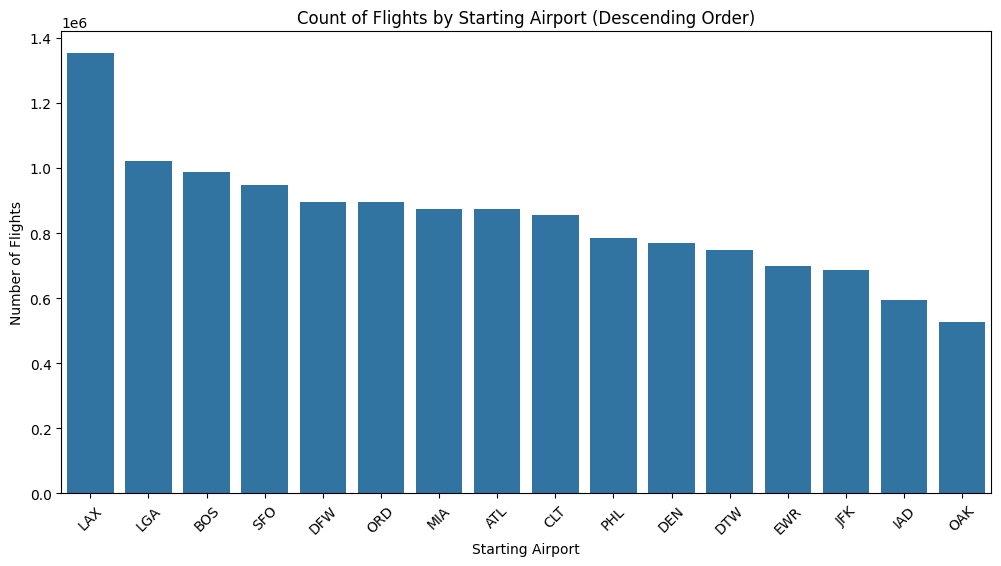

In [57]:
# Create a bar chart to show the count of each starting airport
starting_airport_counts = df['startingAirport'].value_counts(ascending=False)

# Create a bar chart with the sorted values
plt.figure(figsize=(12, 6))
sns.barplot(x=starting_airport_counts.index, y=starting_airport_counts.values)
plt.title("Count of Flights by Starting Airport (Descending Order)")
plt.xlabel("Starting Airport")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [ ]:
# Create a bar chart to show the count of each starting airport
starting_airport_counts = df['startingAirport'].value_counts(ascending=False)

# Create a bar chart with the sorted values
plt.figure(figsize=(12, 6))
sns.barplot(x=starting_airport_counts.index, y=starting_airport_counts.values)
plt.title("Count of Flights by Starting Airport (Descending Order)")
plt.xlabel("Starting Airport")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()